In [102]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5], [0.5])
    ])

batch_size = 4

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                            shuffle=False, num_workers=2)



In [16]:
classes = ('T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

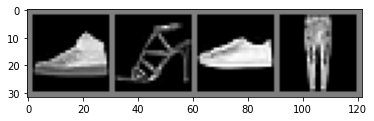

torch.Size([1, 28, 28])


In [17]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(images[0].size())

In [103]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(400, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [104]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
for epoch in range(4):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.286
[1,  4000] loss: 0.293
[1,  6000] loss: 0.275
[1,  8000] loss: 0.289
[1, 10000] loss: 0.265
[1, 12000] loss: 0.283
[1, 14000] loss: 0.270
[2,  2000] loss: 0.256
[2,  4000] loss: 0.260
[2,  6000] loss: 0.263
[2,  8000] loss: 0.255
[2, 10000] loss: 0.260
[2, 12000] loss: 0.255
[2, 14000] loss: 0.262
[3,  2000] loss: 0.248
[3,  4000] loss: 0.246
[3,  6000] loss: 0.238
[3,  8000] loss: 0.252
[3, 10000] loss: 0.254
[3, 12000] loss: 0.231
[3, 14000] loss: 0.240
[4,  2000] loss: 0.239
[4,  4000] loss: 0.219
[4,  6000] loss: 0.232
[4,  8000] loss: 0.233
[4, 10000] loss: 0.228
[4, 12000] loss: 0.232
[4, 14000] loss: 0.232
Finished Training


In [19]:
PATH = './fashion_mnist_lenet3x3.pth'
torch.save(net.state_dict(), PATH)

In [110]:
net = Net()

net.load_state_dict(torch.load('fashion_mnist_lenet3x3.pth'))

<All keys matched successfully>

In [106]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by r`unning images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 89 %


In [107]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class T-shirt is: 89.7 %
Accuracy for class Trouser is: 97.6 %
Accuracy for class Pullover is: 87.4 %
Accuracy for class Dress is: 91.4 %
Accuracy for class Coat  is: 83.2 %
Accuracy for class Sandal is: 98.5 %
Accuracy for class Shirt is: 62.8 %
Accuracy for class Sneaker is: 94.7 %
Accuracy for class Bag   is: 97.6 %
Accuracy for class Ankle Boot is: 96.2 %


In [116]:
import torch.nn.utils.prune as prune
import torch.nn.functional as F

parameters_to_prune = (
    (net.conv1, 'weight'),
    (net.conv2, 'weight'),
    (net.fc1, 'weight'),
    (net.fc2, 'weight'),
    (net.fc3, 'weight'),
)

prune.global_unstructured(
    parameters_to_prune,
    pruning_method=prune.L1Unstructured,
    amount=0.2,
)

In [117]:
print(dict(net.named_buffers()).keys())
print(
    "Sparsity in conv1.weight: {:.2f}%".format(
        100. * float(torch.sum(model.conv1.weight == 0))
        / float(model.conv1.weight.nelement())
    )
)
print(
    "Sparsity in conv2.weight: {:.2f}%".format(
        100. * float(torch.sum(model.conv2.weight == 0))
        / float(model.conv2.weight.nelement())
    )
)
print(
    "Sparsity in fc1.weight: {:.2f}%".format(
        100. * float(torch.sum(model.fc1.weight == 0))
        / float(model.fc1.weight.nelement())
    )
)
print(
    "Sparsity in fc2.weight: {:.2f}%".format(
        100. * float(torch.sum(model.fc2.weight == 0))
        / float(model.fc2.weight.nelement())
    )
)
print(
    "Sparsity in fc3.weight: {:.2f}%".format(
        100. * float(torch.sum(model.fc3.weight == 0))
        / float(model.fc3.weight.nelement())
    )
)
print(
    "Global sparsity: {:.2f}%".format(
        100. * float(
            torch.sum(model.conv1.weight == 0)
            + torch.sum(model.conv2.weight == 0)
            + torch.sum(model.fc1.weight == 0)
            + torch.sum(model.fc2.weight == 0)
            + torch.sum(model.fc3.weight == 0)
        )
        / float(
            model.conv1.weight.nelement()
            + model.conv2.weight.nelement()
            + model.fc1.weight.nelement()
            + model.fc2.weight.nelement()
            + model.fc3.weight.nelement()
        )
    )
)

dict_keys(['conv1.weight_mask', 'conv2.weight_mask', 'fc1.weight_mask', 'fc2.weight_mask', 'fc3.weight_mask'])
Sparsity in conv1.weight: 0.00%
Sparsity in conv2.weight: 9.95%
Sparsity in fc1.weight: 39.36%
Sparsity in fc2.weight: 24.62%
Sparsity in fc3.weight: 9.52%
Global sparsity: 36.00%


In [120]:
print(net.state_dict().keys())

odict_keys(['conv1.bias', 'conv1.weight_orig', 'conv1.weight_mask', 'conv2.bias', 'conv2.weight_orig', 'conv2.weight_mask', 'fc1.bias', 'fc1.weight_orig', 'fc1.weight_mask', 'fc2.bias', 'fc2.weight_orig', 'fc2.weight_mask', 'fc3.bias', 'fc3.weight_orig', 'fc3.weight_mask'])
